In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from skopt import BayesSearchCV

In [12]:

df = pd.read_csv("titanic/train.csv")

In [13]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin', 'Name', 'Ticket', 'PassengerId'], inplace=True)


/tmp/ipykernel_8709/2985108452.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipykernel_8709/2985108452.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

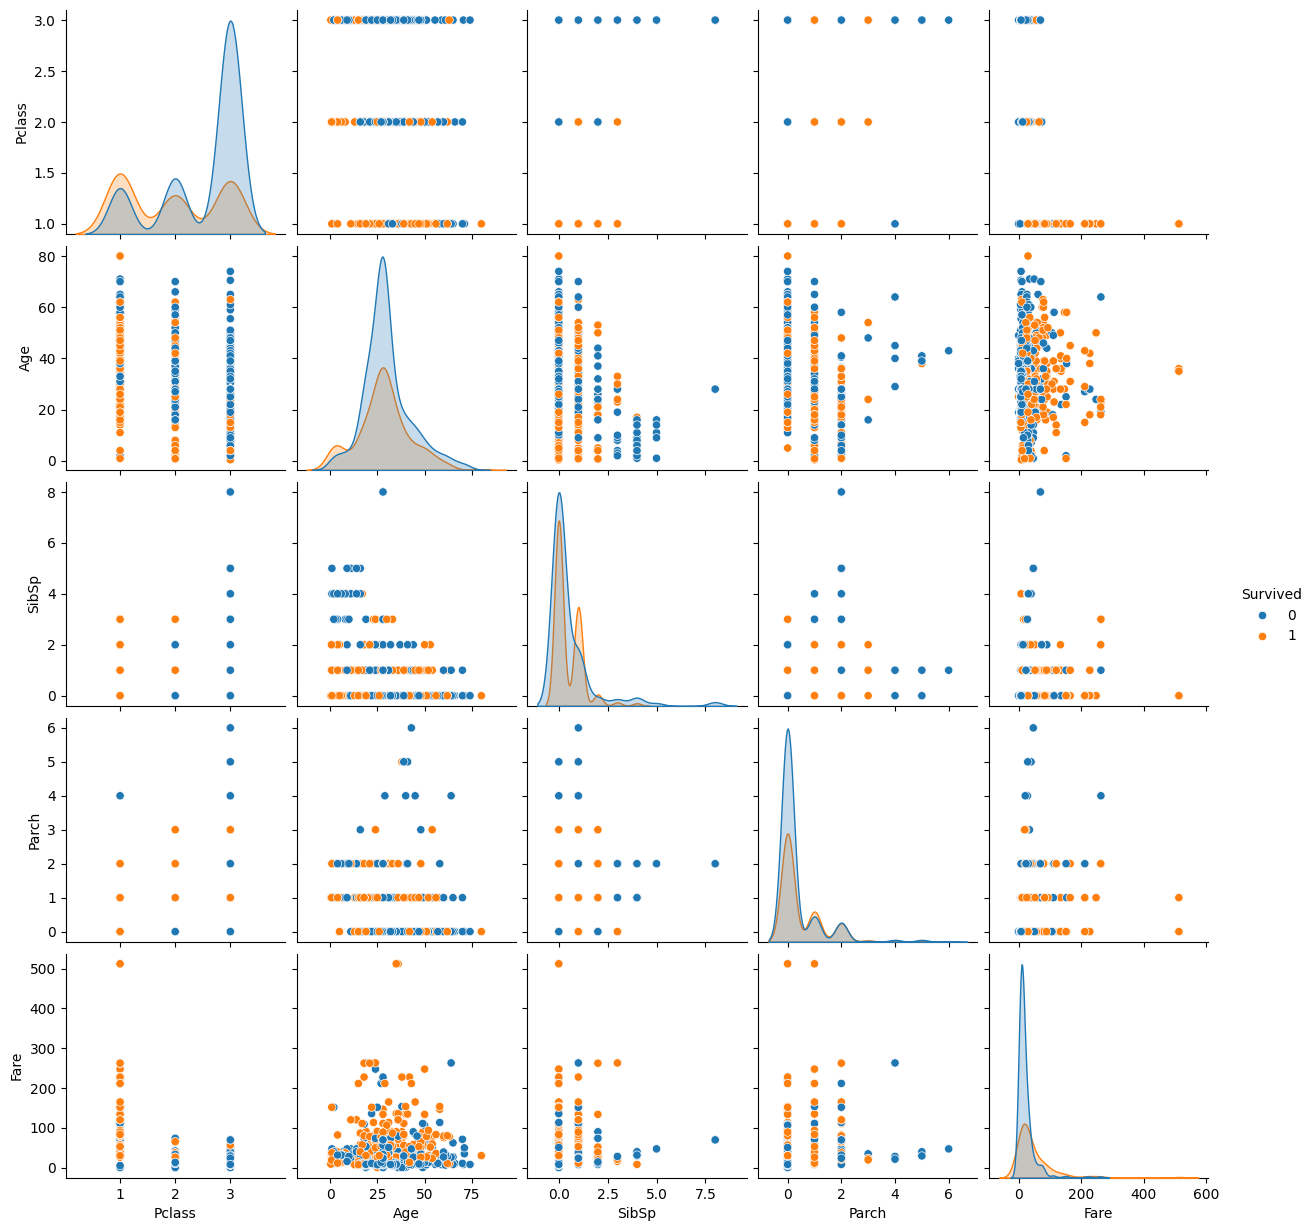

In [14]:
sns.pairplot(df, hue='Survived')
plt.show()

In [15]:
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])


In [16]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
dt_search = BayesSearchCV(
    DecisionTreeClassifier(random_state=42),
    {
        'max_depth': (1, 20),
        'min_samples_split': (2, 20),
        'min_samples_leaf': (1, 20)
    },
    n_iter=30, cv=5, n_jobs=-1, random_state=42
)


In [19]:
dt_search.fit(X_train, y_train)

BayesSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
              n_iter=30, n_jobs=-1, random_state=42,
              search_spaces={'max_depth': (1, 20), 'min_samples_leaf': (1, 20),
                             'min_samples_split': (2, 20)})

In [20]:

dt_best = dt_search.best_estimator_
dt_preds = dt_best.predict(X_test)
print("Decision Tree Metrics:")
print(classification_report(y_test, dt_preds))

Decision Tree Metrics:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       105
           1       0.78      0.69      0.73        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [21]:
rf_search = BayesSearchCV(
    RandomForestClassifier(random_state=42),
    {
        'n_estimators': (50, 300),
        'max_depth': (1, 20),
        'min_samples_split': (2, 20),
        'min_samples_leaf': (1, 20)
    },
    n_iter=30, cv=5, n_jobs=-1, random_state=42
)


In [22]:

rf_search.fit(X_train, y_train)

BayesSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
              n_iter=30, n_jobs=-1, random_state=42,
              search_spaces={'max_depth': (1, 20), 'min_samples_leaf': (1, 20),
                             'min_samples_split': (2, 20),
                             'n_estimators': (50, 300)})

In [23]:

rf_best = rf_search.best_estimator_
rf_preds = rf_best.predict(X_test)
print("Random Forest Metrics:")
print(classification_report(y_test, rf_preds))


Random Forest Metrics:
              precision    recall  f1-score   support

           0       0.81      0.90      0.86       105
           1       0.84      0.70      0.76        74

    accuracy                           0.82       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



In [24]:

importances_dt = pd.Series(dt_best.feature_importances_, index=X.columns)
importances_rf = pd.Series(rf_best.feature_importances_, index=X.columns)


In [25]:

print("\nFeature Importance - Decision Tree:\n", importances_dt.sort_values(ascending=False))
print("\nFeature Importance - Random Forest:\n", importances_rf.sort_values(ascending=False))



Feature Importance - Decision Tree:
 Sex         0.638739
Pclass      0.220952
Age         0.075732
Fare        0.064576
SibSp       0.000000
Parch       0.000000
Embarked    0.000000
dtype: float64

Feature Importance - Random Forest:
 Sex         0.438464
Fare        0.184759
Age         0.135723
Pclass      0.134105
SibSp       0.043053
Embarked    0.039509
Parch       0.024387
dtype: float64


In [26]:

def plot_feature_importance(importances, title):
    importances.sort_values(ascending=True).plot(kind='barh')
    plt.title(title)
    plt.show()


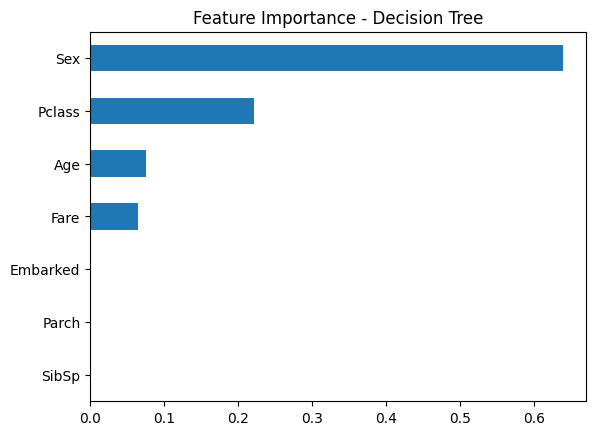

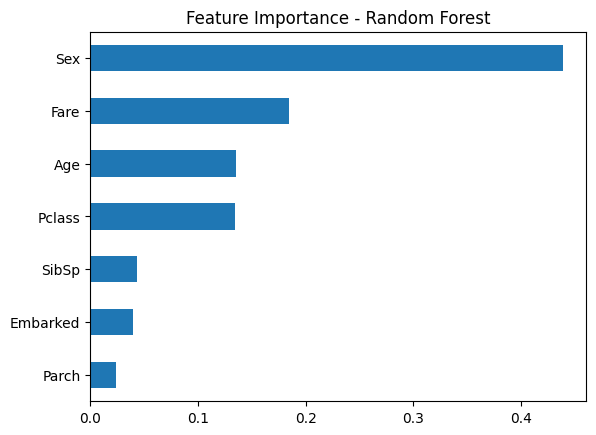

In [27]:

plot_feature_importance(importances_dt, "Feature Importance - Decision Tree")
plot_feature_importance(importances_rf, "Feature Importance - Random Forest")
